# 'Breast_Cancer_Dataset.csv'  
Load the 'Breast_Cancer_Dataset.csv'  
perform the following tasks:
1. Identify the null values and remove the null rows and columns by using the dropna() 
function
2. Encode the 'diagnosis' column using the LabelEncoder()
3. Considering the 'diagnosis' column as the target, separate the target variable and the 
feature vectors
4. Split the dataset into the training set and test set in a 70:30 ratio
5. Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and 
RandomForestClassifier models; Also print their accuracies
6. Calculate and plot the confusion matrix
7. Calculate the ROC_AUC score based on the False Positive Rate (FPR) and True Positive 
Rate (TPR)
8. Plot the ROC Curve using the Matplotlib library
9. Calculate the F1 Score
10. Calculate and Print the Precision, Recall, and F1 score using the classification_report() 
function


# 1.Identify the null values and remove the null rows and columns by using the dropna() function

In [1]:
import pandas as pd

# load the dataset

df = pd.read_csv('Breast_Cancer_Dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# Identify and remove null rows
df.dropna(inplace=True)  

In [3]:
# Identify and remove null columns
df.dropna(axis=1, inplace=True)

# 2.Encode the 'diagnosis' column using the LabelEncoder()

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'diagnosis' column
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [5]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

# 3. Considering the 'diagnosis' column as the target, separate the target variable and the feature vectors.

In [6]:
X = df.drop('diagnosis', axis=1)  # Feature vectors
y = df['diagnosis'] # Target variable

In [7]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

# 4. Split the dataset into the training set and test set in a 70:30 ratio.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# 5. Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also print their accuracies.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [14]:
# Initialize models

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-NN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

In [19]:
# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy:{accuracy}")

Logistic Regression Accuracy:0.631578947368421
Naive Bayes Accuracy:0.6374269005847953
Decision Tree Accuracy:0.9298245614035088
K-NN Accuracy:0.7134502923976608
SVM Accuracy:0.631578947368421
Random Forest Accuracy:0.9707602339181286


# 6. Calculate and plot the confusion matrix

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [21]:
# calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[106,   2],
       [  3,  60]], dtype=int64)

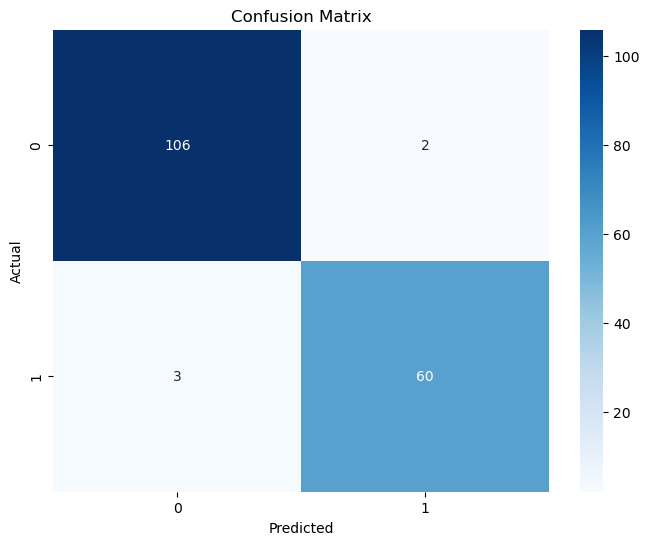

In [23]:
# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True,cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 7. Calculate the ROC_AUC score based on the False Positive Rate (FPR) and True Positive Rate (TPR).

In [24]:
from sklearn.metrics import roc_auc_score

#calculate ROC_AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC_AUC score: {roc_auc}")

ROC_AUC score: 0.966931216931217


# 8. Plot the ROC Curve using the Matplotlib library.

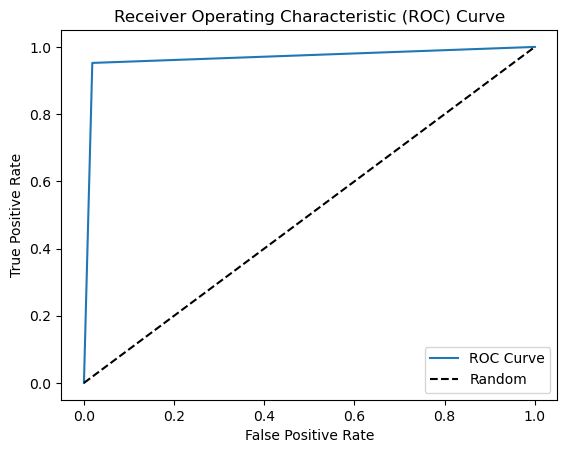

In [25]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1],[0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 9. Calculate the F1 Score.

In [27]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.96


# 10. Calculate and print the Precision, Recall, and F1 score using the classification_report() function.

In [28]:
from sklearn.metrics import classification_report

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

